In [1]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

In [2]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/baru')

Mounted at /content/drive


In [3]:
#Daftar sub-direktori
subdirectories = ['test', 'train', 'valid']

#Loop melalui setiap sub-direktori
for subdir in subdirectories:
    subdir_path = os.path.join('/content/drive/MyDrive/baru', subdir)

    #List semua file gambar di sub-direktori
    image_files = [file for file in os.listdir(subdir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    #Tampilkan setiap gambar
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(os.path.join(subdir, image_file))
        plt.show()
#Cetak jalur saat ini
print("Current Directory:", os.getcwd())

#Cetak isi direktori "bongkahan"
print("Contents of brondolan:", os.listdir('/content/drive/MyDrive/baru'))

#Cetak isi sub-direktori "test"
print("Contents of test:", os.listdir('/content/drive/MyDrive/baru/test'))

Current Directory: /content/drive/MyDrive/baru
Contents of brondolan: ['valid', 'train', 'test']
Contents of test: ['ripe', 'unripe']


In [4]:
training = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_generator = training.flow_from_directory(
    '/content/drive/MyDrive/baru/train',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)
testing_generator = training.flow_from_directory(
    '/content/drive/MyDrive/baru/test',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)

Found 123 images belonging to 2 classes.
Found 151 images belonging to 2 classes.


In [30]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [31]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                81984     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2340033 (8.93 MB)
Trainable params: 8204

In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [34]:
history = model.fit(training_generator, validation_data=testing_generator, epochs=50, callbacks=[callback])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 6s 759ms/step - loss: 0.6270 - accuracy: 0.7480 - val_loss: 0.7073 - val_accuracy: 0.5629
Epoch 2/50
4/4 [==============================] - 2s 705ms/step - loss: 0.4314 - accuracy: 0.7805 - val_loss: 0.8353 - val_accuracy: 0.6424
Epoch 3/50
4/4 [==============================] - 2s 632ms/step - loss: 0.2481 - accuracy: 0.9187 - val_loss: 0.6810 - val_accuracy: 0.6887
Epoch 4/50
4/4 [==============================] - 2s 593ms/step - loss: 0.1814 - accuracy: 0.9268 - val_loss: 0.6982 - val_accuracy: 0.6755
Epoch 5/50
4/4 [==============================] - 2s 708ms/step - loss: 0.1350 - accuracy: 0.9593 - val_loss: 0.7313 - val_accuracy: 0.6821
Epoch 6/50
4/4 [==============================] - 2s 441ms/step - loss: 0.1042 - accuracy: 0.9837 - val_loss: 0.7269 - val_accuracy: 0.6623
Epoch 7/50
4/4 [==============================] - 1s 415ms/step - loss: 0.1299 - accuracy: 0.9350 - val_loss: 0.8069 - val_accuracy: 0.6358
Epoch 8/50
4/4 [===============

4/4 - 1s - loss: 0.1521 - accuracy: 0.9593 - 723ms/epoch - 181ms/step


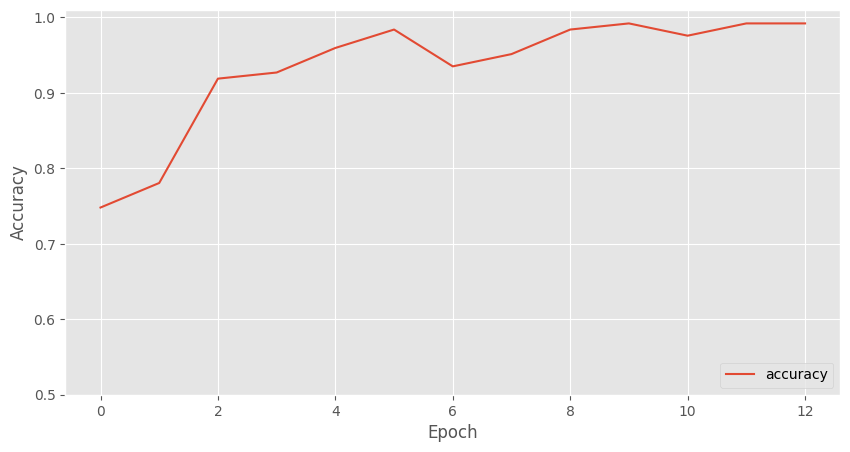

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(training_generator, verbose=2)

In [36]:
result = model.evaluate(training_generator)

4/4 [==============================] - 1s 163ms/step - loss: 0.1521 - accuracy: 0.9593


Saving mentah (16).jpg to mentah (16).jpg
1/1 [==============================] - 0s 21ms/step
0.95040196
Unripe - Mentah, akurasi: 95%


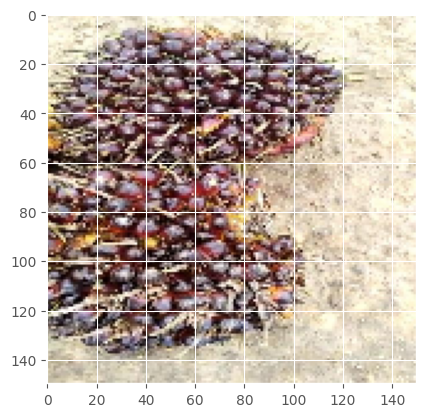

In [74]:
from google.colab import files

image_data = files.upload()
image_file = list(image_data.keys())[0]
image = tf.keras.utils.load_img(image_file, target_size=(150, 150))
image_array = tf.keras.utils.img_to_array(image)
image_array = image_array / 255.
image_array = np.array([image_array])
result_predict = model.predict(image_array)[0][0]
print(result_predict)
if(result_predict > 0.5):
  print(f'Unripe - Mentah, akurasi: {int(result_predict * 100)}%')
else:
  print(f'Ripe - Matang, akurasi: {100 - int(result_predict * 100)}%')
plt.imshow(image)
plt.show()

In [ ]:
model.save('model-sawit.h5')

In [ ]:
# # Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# # save model.
with open('model_brondolansawit16desember.tflite','wb') as f:
  f.write(tflite_model)